In [ ]:
# periodic time series

#  time series modeling process

# 1. stationary test
#    trend model:
#         Aggregation – taking average for a time period like monthly/weekly averages
#         Smoothing – taking rolling averages
#         Polynomial Fitting – fit a regression model
#    seasonality model:
#         differencing
#         model fitting
# 2. stationalize time series
#       detrend
#       remove seasonality
# 3. model the stationary part of time series        

#    seasonal-ARIMA 

# 4. perform prediction 


# TO DO
# plain time series prediction
# periodic time series prediction

# https://dandelion.eu/datamine/open-big-data/


In [ ]:
# http://www.johnwittenauer.net/a-simple-time-series-analysis-of-the-sp-500-index/
 

In [ ]:
# TO DO: 

# Statistics programming 

# book:

# Probabilistic Programming and Bayesian Methods for Hackers 
# http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb

In [ ]:
# Examples:

# stock prediction
# https://bitbucket.org/joexdobs/ml-classifier-gesture-recognition/wiki/stock-example/
# predict-future-stock-price-using-machine-learning.md

# statsmodels:
#  http://statsmodels.sourceforge.net/stable/index.html

# http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

# http://nbviewer.jupyter.org/gist/ChadFulton/5127108f4c7025ed2648

# https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

# http://nbviewer.jupyter.org/github/jakevdp/SeattleBike/blob/master/SeattleCycling.ipynb

# book
# http://shelfjoy.com/shelfjoy/17-essential-machine-learning-books-suggested-by-michael-i-jordan-from-berkeley

In [ ]:
# BASELINE

#  GP
#  S-ARIMA
#  SVR

#  RF
#  GBT
#  xgboosted 

# TO DO:
# keep the same training dataset

In [4]:
def tempfunc():
    return 1,2,3


tmpa= tempfunc()
print tmpa[0]

1


In [2]:
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

import utils_libs
from utils_dataPrepro import *

In [2]:
[1]*10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# DATASETS

# http://redd.csail.mit.edu/readme.txt
# uci: stock, house power load, 

# http://cseweb.ucsd.edu/∼yaq007/NASDAQ100 stock data.html


In [3]:

# ddata preprocessing utilities
def y_distribution_plot( ylist, title_str ):
    
    fig = plt.figure()
    n, bins, patches = plt.hist(ylist, normed=1, facecolor='green', alpha=0.75)
#   y = mlab.normpdf( bins, mu, sigma)
#   l = plt.plot(bins, y, 'r--', linewidth=1)

    plt.xlabel('Values')
    plt.ylabel('Probability')
    plt.title(title_str)
#   plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
#   fig.savefig('./results/classDis.jpg', format='jpg', bbox_inches='tight')  
    
def multivariate_ts_plot( dta_df, title_str ):
        
    matplotlib.rcParams.update({'font.size': 15})
    figure_size = (15.4,7)
    legend_font = 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )
    
    tmpt = range(dta_df.shape[0])
    for i in dta_df.columns:
        
        tmpx = list(dta_df[i])    
        plt.plot( tmpt, tmpx, label= i )

#     axes = plt.gca()
#     axes.set_xlim([1, tdf.shape[0]+10])
#     axes.set_ylim([yrange[0], yrange[1]])

    # plt.plot( list( clean_tdf['value']), color='g' )

    # plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
    # axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title( title_str )
    plt.ylabel('Value')
    plt.xlabel('Time')
    # plt.legend( loc='upper left',fontsize=12 )
    plt.legend(loc='upper left')
    #     bbox_to_anchor=(0., 1.0, 1., .10),
    #            loc=0,
    #            ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )


Shape of the dataset:  (16653, 7)
Shape of training and testing dataset:  (3800, 200) (3800,) (1300, 200) (1300,)


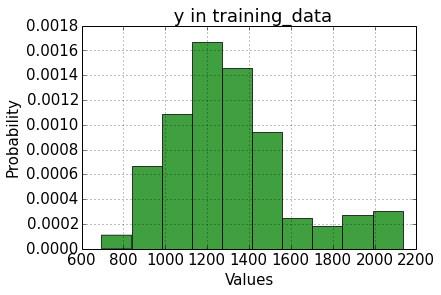

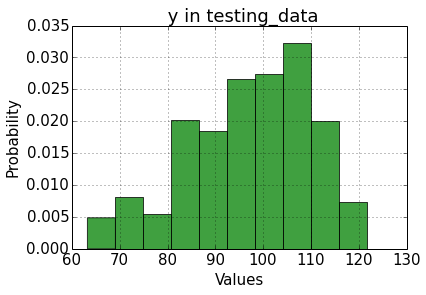

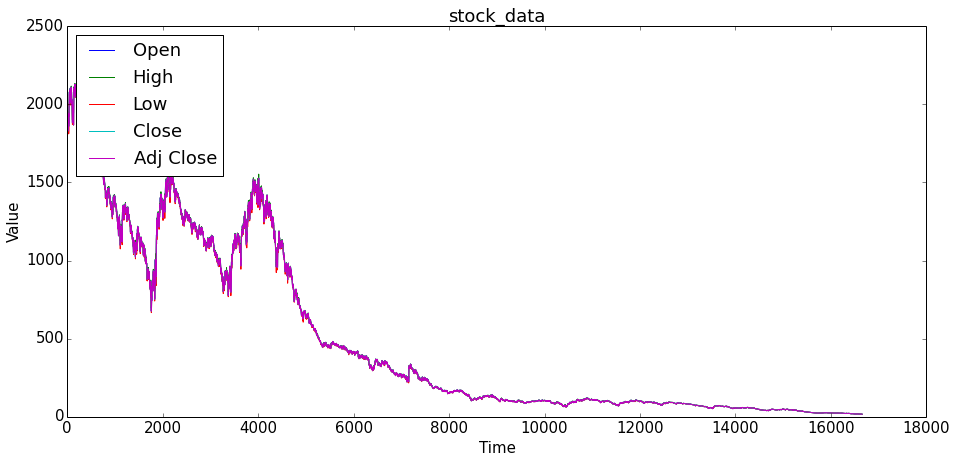

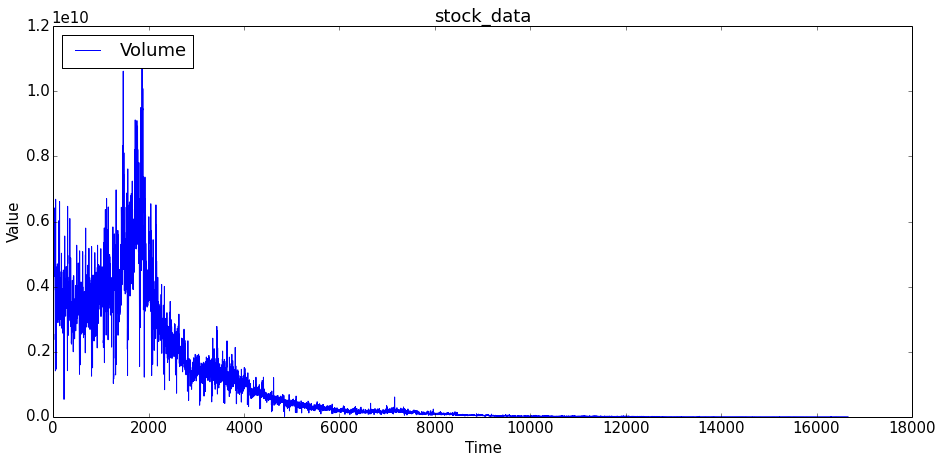

In [8]:
# stock dataset for machine learning 
# ([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

para_uni_variate = True
para_train_test_split = False
para_win_size = 200

para_train_range = (0,4000)
para_test_range  = (10000,11500)


addr = "../../dataset/dataset_ts/stock.csv"
dta_df = pd.read_csv( addr ,sep=',')
print 'Shape of the dataset: ', dta_df.shape


x_train, x_test, y_train, y_test = build_training_testing_data_4learning( dta_df, 'High', ['Open','Volume'], \
                        para_uni_variate, para_train_test_split, para_win_size, para_train_range, para_test_range)

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)

# upsampling the training dataset if needed

# visualization
y_distribution_plot( y_train, ' y in training_data' )
y_distribution_plot( y_test,  ' y in testing_data' )

tmpdf = dta_df.drop(['Date', 'Volume'], axis=1)
multivariate_ts_plot( tmpdf, 'stock_data' )

multivariate_ts_plot( dta_df[ ['Volume'] ], 'stock_data' )


In [9]:
# stock dataset
# fix the training and testing datasets by materialization

x_train.dump("../../dataset/dataset_ts/stock_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/stock_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/stock_xtest.dat")
y_test.dump("../../dataset/dataset_ts/stock_ytest.dat")


# np.savetxt("../dataset/dataset_ts/stock_xtrain.csv", x_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/stock_xtest.csv",  x_test,  delimiter=",")
# np.savetxt("../dataset/dataset_ts/stock_ytrain.csv", y_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/stock_ytest.csv",  y_test,  delimiter=",")

In [10]:
# stock dataset for statistics

para_uni_variate = True

para_train_range = (0,4000)
para_test_range  = (4000,5500)


addr = "../dataset/dataset_ts/stock.csv"
dta_df = pd.read_csv( addr ,sep=',')
print 'Shape of the dataset: ', dta_df.shape

x_train, x_test = build_training_testing_data_4statistics( dta_df, 'Close', ['Open','Volume'], \
                        para_uni_variate, para_train_range, para_test_range)

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(x_test)

x_train.dump("../dataset/dataset_ts/stock_xtrain_statis.dat")
x_test.dump("../dataset/dataset_ts/stock_xtest_statis.dat")

Shape of the dataset:  (16653, 7)
Shape of training and testing dataset:  (4000,) (1500,)


Shape of the dataset:  (9999, 9)
(9997, 9)
Shape of training and testing dataset:  (8300, 200) (8300,) (1297, 200) (1297,)


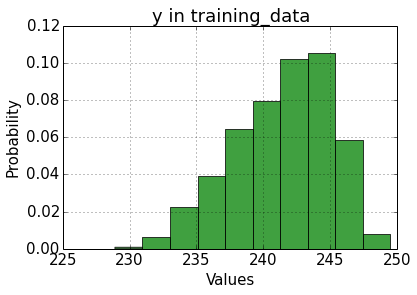

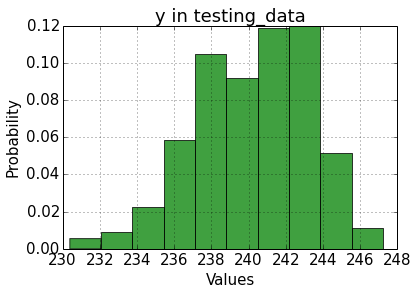

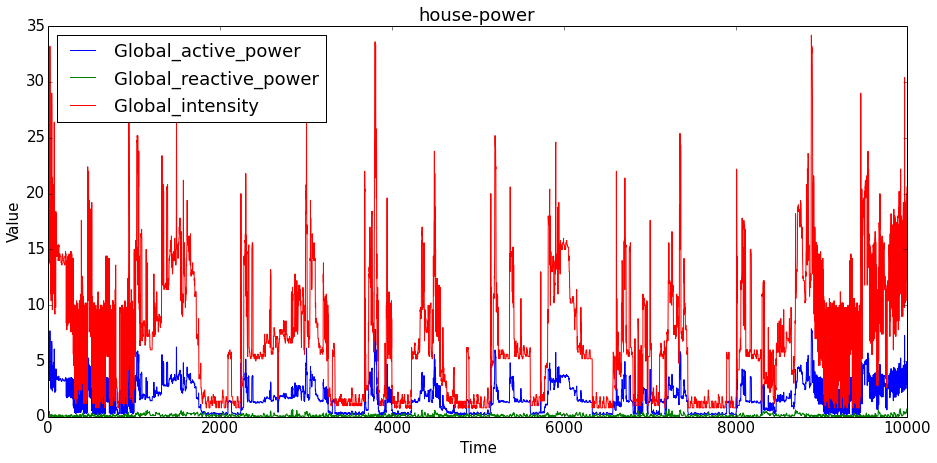

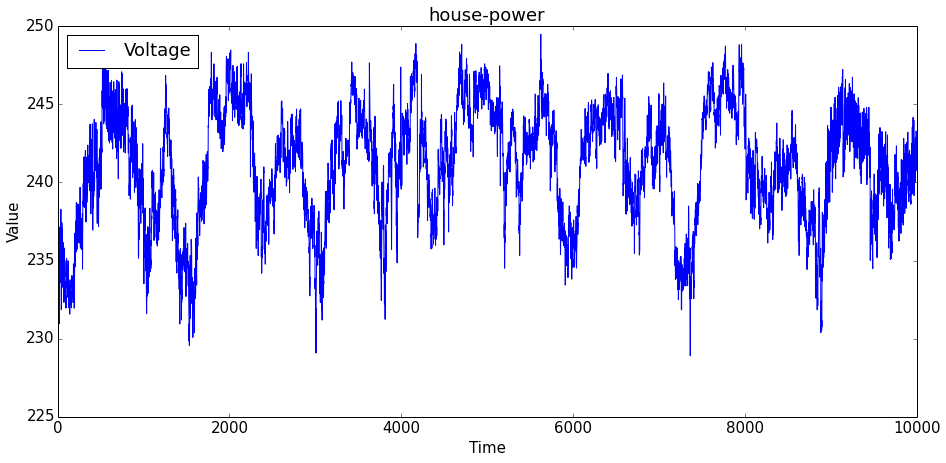

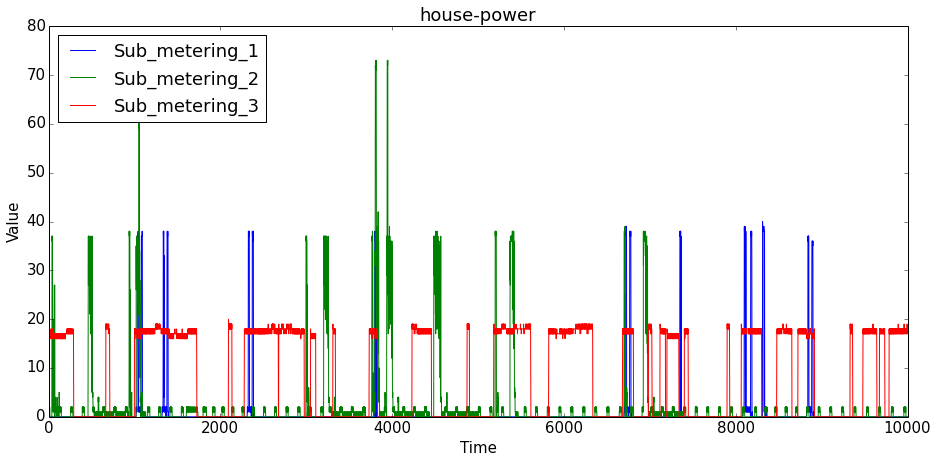

In [23]:
# house-power for machine learning 

# Date;Time;Global_active_power;Global_reactive_power;
# Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3

para_uni_variate = True
para_train_test_split = False
para_win_size = 200

para_train_range = (0,8500)
para_test_range  = (8500,9999)

addr = "../../dataset/dataset_ts/house-power.csv"
dta_df = pd.read_csv( addr ,sep=';')
print 'Shape of the dataset: ', dta_df.shape

#----- clean ----- 

dta_df.drop( dta_df[ dta_df['Global_active_power'] == '?' ].index, inplace=True )
dta_df = dta_df.dropna(axis=0)

print dta_df.shape
# ----------------

# ------ type conversion -----

tmpcol = [ 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',\
          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' ]

for i in tmpcol:
    dta_df[i] = dta_df[i].astype(float)

# ----------------------------


x_train, x_test, y_train, y_test = \
build_training_testing_data_4learning( dta_df, 'Voltage', ['Global_active_power','Sub_metering_1'], \
                                para_uni_variate, para_train_test_split, para_win_size, \
                             para_train_range, para_test_range )

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)


# visualization
y_distribution_plot( y_train, 'y in training_data' )
y_distribution_plot( y_test,  'y in testing_data' )

# tmpdf = dta_df.drop(['Date', 'Time', 'Voltage'], axis=1)
# multivariate_ts_plot( tmpdf, 'house-power' )

multivariate_ts_plot( dta_df[ ['Global_active_power', 'Global_reactive_power',\
                               'Global_intensity'] ],\
                     'house-power' )

multivariate_ts_plot( dta_df[ ['Voltage'] ], 'house-power' )

multivariate_ts_plot( dta_df[ ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'] ], \
                     'house-power' )

In [24]:
# house power
# fix the training and testing datasets by materialization

x_train.dump("../../dataset/dataset_ts/power_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/power_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/power_xtest.dat")
y_test.dump("../../dataset/dataset_ts/power_ytest.dat")

# np.savetxt("../dataset/dataset_ts/power_xtrain.csv", x_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/power_xtest.csv", x_test, delimiter=",")
# np.savetxt("../dataset/dataset_ts/power_ytrain.csv", y_train, delimiter=",")
# np.savetxt("../dataset/dataset_ts/power_ytest.csv", y_test, delimiter=",")

Shape of the dataset:  (9471, 17) Index([u'Date', u'Time', u'CO(GT)', u'PT08.S1(CO)', u'NMHC(GT)', u'C6H6(GT)',
       u'PT08.S2(NMHC)', u'NOx(GT)', u'PT08.S3(NOx)', u'NO2(GT)',
       u'PT08.S4(NO2)', u'PT08.S5(O3)', u'T', u'RH', u'AH', u'Unnamed: 15',
       u'Unnamed: 16'],
      dtype='object')
Shape of training and testing dataset:  (4700, 300, 3) (4700,) (1700, 300, 3) (1700,)


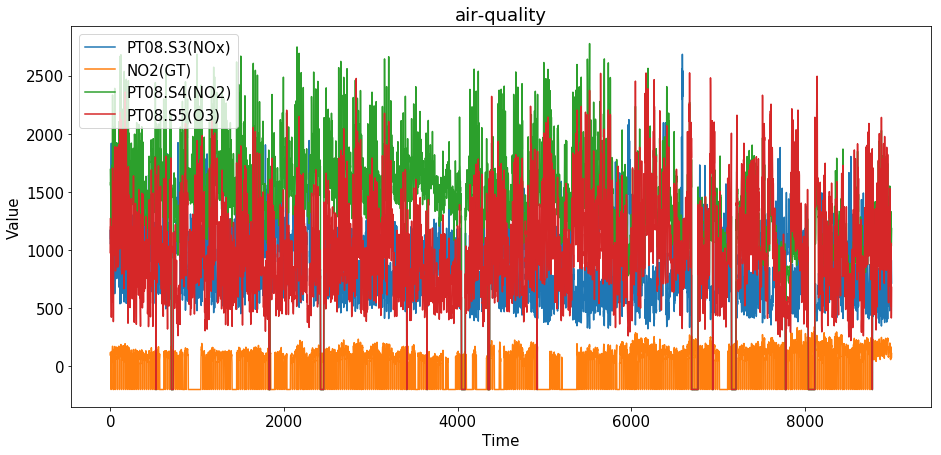

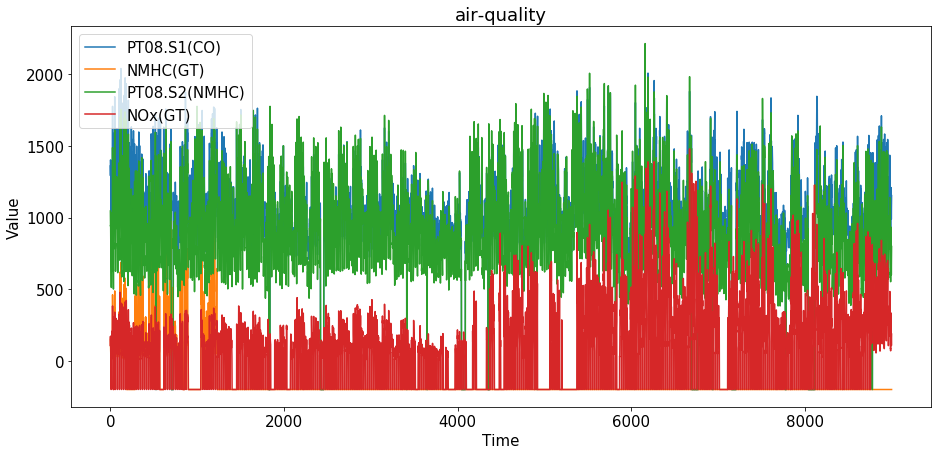

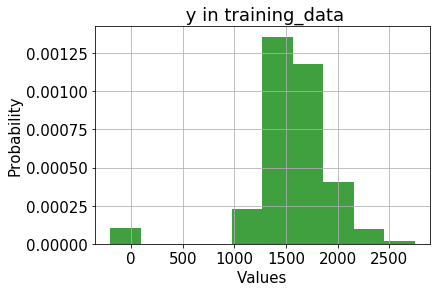

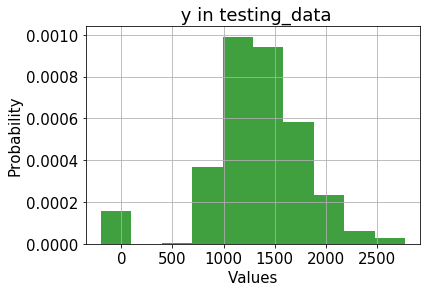

In [4]:
# air-quality dataset for machine learning 
# ([u'Date', u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

para_uni_variate = False
para_train_test_split = False
para_win_size = 300

para_train_range = (0,5000)
para_test_range  = (5000,7000)

para_is_stateful = False

addr = "../../dataset/dataset_ts/air-quality.csv"
dta_df = pd.read_csv( addr ,sep=';')
print 'Shape of the dataset: ', dta_df.shape, dta_df.columns

# visualization of original data

tmpdf = dta_df.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16','CO(GT)', \
                     'C6H6(GT)', 'T', 'RH', 'AH'], axis=1)

multivariate_ts_plot( tmpdf[['PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']][:9000], 'air-quality' )

multivariate_ts_plot( tmpdf[['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)']][:9000], 'air-quality' )


# extract training and testing data
x_train, x_test, y_train, y_test = build_training_testing_data_4learning( dta_df, 'PT08.S4(NO2)', \
                        [ 'NOx(GT)', 'NMHC(GT)' ], \
                        para_uni_variate, para_train_test_split, \
                        para_win_size, para_train_range, para_test_range, para_is_stateful)

# 'NMHC(GT)'

print 'Shape of training and testing dataset: ', np.shape(x_train), np.shape(y_train),\
    np.shape(x_test), np.shape(y_test)

# upsampling the training dataset if needed

# visualization of training and testing data 
y_distribution_plot( y_train, ' y in training_data' )
y_distribution_plot( y_test,  ' y in testing_data' )

In [5]:
# air quality
x_train.dump("../../dataset/dataset_ts/air_xtrain.dat")
y_train.dump("../../dataset/dataset_ts/air_ytrain.dat")
x_test.dump("../../dataset/dataset_ts/air_xtest.dat")
y_test.dump("../../dataset/dataset_ts/air_ytest.dat")